
<h1 style='background-color:Green; font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 15px 50px;' > Auto-Sklearn </h1>


##### The Auto-Sklearn architecture is composed of 3 phases: meta-learning, bayesian optimization, ensemble selection. The key idea of the meta-learning phase is to reduce the space search by learning from models that performed well on similar datasets. Right after, the bayesian optimization phase takes the space search created in the meta-learning step and creates bayesian models for finding the optimal pipeline configuration. Finally, an ensemble selection model is created by reusing the most accurate models found in the bayesian optimization step. In Figure 2 it’s described the Auto-Sklearn architectur



<img src="https://miro.medium.com/max/1000/1*w8qIzewO97qdqmiZi69Maw.jpeg" width="800px">



<h1 style='background-color:Green; font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 15px 50px;' > Heart Failure </h1>

##### Heart failure, sometimes known as congestive heart failure, occurs when your heart muscle doesn't pump blood as well as it should. Certain conditions, such as narrowed arteries in your heart (coronary artery disease) or high blood pressure, gradually leave your heart too weak or stiff to fill and pump efficiently.


<img src="https://2rdnmg1qbg403gumla1v9i2h-wpengine.netdna-ssl.com/wp-content/uploads/sites/3/2017/01/HeartDiseaseCloggedArteries-650x428.jpg" width="800px">


<h1 style='background-color:Green; font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 15px 50px;' > Dataset in this link </h1>




#### [Click Here](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)

In [1]:
pip install auto-sklearn

     |████████████████████████████████| 6.1 MB 5.7 MB/s 
     |████████████████████████████████| 4.0 MB 8.2 MB/s 
     |████████████████████████████████| 258 kB 11.3 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.12.6-py3-none-any.whl size=6370105 sha256=2a7e0e4fd3c87b041eab3c3c88a96fdd4eac147899ba9fc2c862730aabb027ee
  Stored in directory: /root/.cache/pip/wheels/d7/3b/13/16c70d17238ed87701c28cf69688dcb4df7ad71b0db11fe0e2
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7043 sha256=f32e3b193582934ccc0a20aea56e0157056112c8a0047b9f82611d2925b7e035
  Stored in directory: /root/.cache/pip/wheels/42/71/95/7555ec3253e1ba8add72ae5febf1b015d297f3b73ba296d6f6
  Created wheel for smac: filename=smac-0.13.1-py3-none-any.whl size=252176 sha256=7efc4adce5e81747ec00379bc3730fdf3643616e402f214e49c938863ed00aea
  Stored in directory: /root/.cache/pip/wheels/35/b9/6b/17b5f3d627b1be6cdcc5357f797bd9e4ea8cbae3d1ff00e621
  Created wheel for lazy-import: filename

In [2]:
# Import Lab
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from autosklearn.classification import AutoSklearnClassifier

/opt/conda/lib/python3.7/site-packages/pyparsing.py:3190: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [3]:
# Load the dataset

df= pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

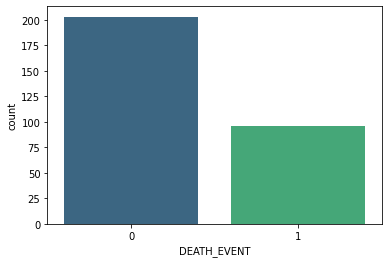

In [6]:
df["DEATH_EVENT"].value_counts()

df["DEATH_EVENT"].value_counts() * 100 / len(df)


sns.countplot(x="DEATH_EVENT", data=df, palette='viridis')

In [7]:
from sklearn.utils import resample

not_fraud = df[df["DEATH_EVENT"] == 0]
fraud = df[df["DEATH_EVENT"] == 1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled["DEATH_EVENT"].value_counts()

0    203
1    203
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

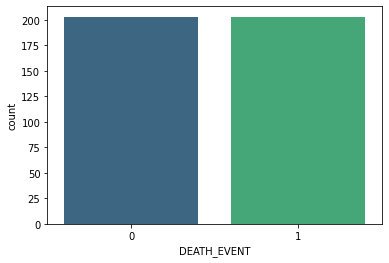

In [8]:
upsampled["DEATH_EVENT"].value_counts()

upsampled["DEATH_EVENT"].value_counts() * 100 / len(df)


sns.countplot(x="DEATH_EVENT", data=upsampled, palette='viridis')

In [9]:
import pandas_profiling as pp
pp.ProfileReport(upsampled)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='time', ylabel='age'>

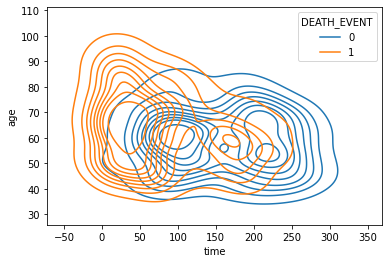

In [10]:
sns.kdeplot(x=upsampled["time"], y=upsampled["age"], hue =upsampled["DEATH_EVENT"])

In [11]:
x=upsampled.drop(["DEATH_EVENT"],axis=1)
y=upsampled["DEATH_EVENT"]

In [12]:
# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=23)

In [13]:
print(f'Training Shape x:',x_train.shape)
print(f'Testing Shape x:',x_test.shape)
print('*****___________*****___________*****')
print(f'Training Shape y:',x.shape)
print(f'Testing Shape y:',y.shape)

Training Shape x: (324, 12)
Testing Shape x: (82, 12)
*****___________*****___________*****
Training Shape y: (406, 12)
Testing Shape y: (406,)


In [14]:
# Auto-Sklearn Initialization

# time_left_for_this_task : Time limit in seconds to find the optimal configuration
# per_run_time_limi : Time limit in seconds for the each model
# ensemble_size: Number of models added to the Ensemble model
# initial_configurations_via_metalearning: "k" configurations to start the Bayesian Optimization
model = AutoSklearnClassifier(time_left_for_this_task=300, 
                              per_run_time_limit=9, 
                              ensemble_size=1, 
                              initial_configurations_via_metalearning=0)
# Init training
model.fit(x_train, y_train)

AutoSklearnClassifier(ensemble_size=1,
                      initial_configurations_via_metalearning=0,
                      per_run_time_limit=9, time_left_for_this_task=300)

In [15]:
model.score(x_train, y_train)

0.9660493827160493

In [16]:
model.score(x_test, y_test)

0.8902439024390244

In [17]:
print(model.sprint_statistics())

auto-sklearn results:
  Dataset name: 148570a8-a67c-11eb-8014-0242ac130202
  Metric: accuracy
  Best validation score: 0.897196
  Number of target algorithm runs: 45
  Number of successful target algorithm runs: 44
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0



In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')

CM: [[36  6]
 [ 3 37]]
Accuracy: 89.02439024390245 %


Confussion Matrix: 
[[36  3]
 [ 6 37]]



<AxesSubplot:>

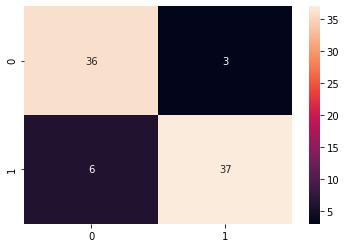

In [19]:
conf_matrix = confusion_matrix(y_pred, y_test)

print(f'Confussion Matrix: \n{conf_matrix}\n')

sns.heatmap(conf_matrix, annot=True)

In [20]:
#Performance Measures
tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]

total = tn + fp + tp + fn
real_positive = tp + fn
real_negative = tn + fp

In [21]:
accuracy  = (tp + tn) / total # Accuracy Rate
precision = tp / (tp + fp) # Positive Predictive Value
recall    = tp / (tp + fn) # True Positive Rate
f1score  = 2 * precision * recall / (precision + recall)
specificity = tn / (tn + fp) # True Negative Rate
error_rate = (fp + fn) / total # Missclassification Rate
prevalence = real_positive / total
miss_rate = fn / real_positive # False Negative Rate
fall_out = fp / real_negative # False Positive Rate

print(f'Accuracy    : {accuracy}')
print(f'Precision   : {precision}')
print(f'Recall      : {recall}')
print(f'F1 score    : {f1score}')
print(f'Specificity : {specificity}')
print(f'Error Rate  : {error_rate}')
print(f'Prevalence  : {prevalence}')
print(f'Miss Rate   : {miss_rate}')
print(f'Fall Out    : {fall_out}')

Accuracy    : 0.8902439024390244
Precision   : 0.925
Recall      : 0.8604651162790697
F1 score    : 0.891566265060241
Specificity : 0.9230769230769231
Error Rate  : 0.10975609756097561
Prevalence  : 0.524390243902439
Miss Rate   : 0.13953488372093023
Fall Out    : 0.07692307692307693


In [22]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        39
           1       0.93      0.86      0.89        43

    accuracy                           0.89        82
   macro avg       0.89      0.89      0.89        82
weighted avg       0.89      0.89      0.89        82

